Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [54]:
%matplotlib inline

import nsfg
import thinkstats2
import thinkplot
import numpy as np
import random
preg = nsfg.ReadFemPreg()

Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [2]:
livebirths = preg[preg.outcome == 1]

In [17]:
weights = livebirths.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')
sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]
rank_cdf = thinkstats2.Cdf(ranks)


Display the CDF.

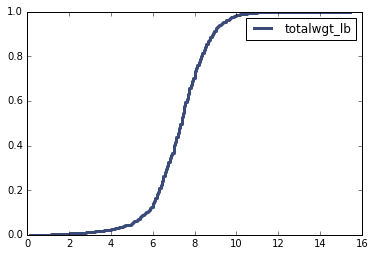

In [16]:
thinkplot.Cdf(cdf, label='totalwgt_lb')
thinkplot.Show()


Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [18]:
cdf.Prob(7)

0.40185881832263776

If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [22]:
firstchildren = livebirths[livebirths.birthord == 1]
firstchildren_weights = firstchildren.totalwgt_lb
cdf_firsts = thinkstats2.Cdf(firstchildren_weights, label='totalwgt_lb')
cdf_firsts.Prob(7)

0.4180609672243869

Compute the percentile rank of your birthweight

In [23]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [24]:
PercentileRank(weights, 7)

39.70266724967206

Compute the median birth weight by looking up the value associated with p=0.5.

In [37]:
def Percentile(scorelist, percentile_rank):
    sortedscores = scorelist.order()
    for score in sortedscores:
        if PercentileRank(sortedscores, score) >= percentile_rank:
            return score

In [39]:
Percentile(weights, 50)

/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


7.375

Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [40]:
Percentile(weights, 25)
Percentile(weights, 75)

/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


8.125

Make a random selection from <tt>cdf</tt>.

In [47]:
cdf.Random()

5.5625

Draw a random sample from <tt>cdf</tt>.

In [48]:
cdf.Sample(10)

array([ 9.625 ,  6.0625,  9.625 ,  8.25  ,  7.375 ,  6.1875,  6.5   ,
        8.25  ,  9.6875,  6.4375])

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

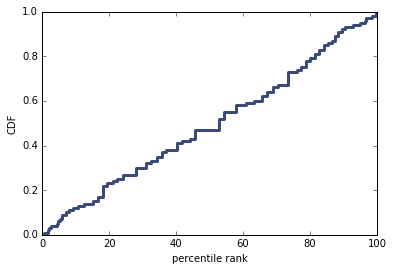

In [49]:
sample = cdf.Sample(100)
ranks = [cdf.PercentileRank(x) for x in sample]
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

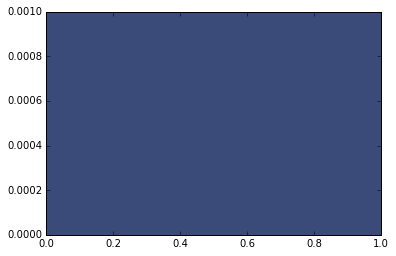

In [55]:
randomValues = [random.random() for i in range(1000)]
randPMF = thinkstats2.Pmf(randomValues)
thinkplot.Pmf(randPMF)
thinkplot.Show()

randCDF = thinkstats2.Cdf(randomValues)
thinkplot.Cdf(randCDF)
thinkplot.Show()

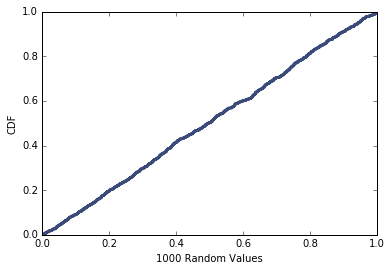

In [56]:
randCDF = thinkstats2.Cdf(randomValues)
thinkplot.Cdf(randCDF)
thinkplot.Show(xlabel='1000 Random Values', ylabel='CDF')



### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.